In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# Set the working directory
os.chdir('/Users/ozgurbozcaga/Desktop')

In [8]:
# Load the dataset (make sure the data file is saved in your directory)
data = pd.read_excel('temp.xlsx')

In [10]:
data.head()

,Year,Jan.,Feb.,Mar.,Apr.,May,June,July,Aug.,Sep.,Oct.,Nov.,Dec.,Annual
0,1880,0.13,0.04,0.19,0.11,0.18,0.07,0.04,0.16,0.10,0.01,0.04,0.10,0.10
1,1881,0.13,0.14,0.30,0.31,0.34,0.10,0.25,0.22,0.09,0.01,0.07,0.22,0.18
2,1882,0.49,0.43,0.32,0.12,0.14,0.07,0.08,0.18,0.11,0.01,0.09,-0.07,0.16
3,1883,0.04,-0.07,0.16,0.09,0.10,0.22,0.17,0.11,0.03,0.12,0.02,0.18,0.10
4,1884,0.20,0.21,-0.09,-0.12,-0.06,-0.06,-0.07,-0.02,-0.02,-0.01,-0.07,-0.02,-0.01


In [22]:
# Extract year and annual temperature anomaly data
years = data['Year']
annual_mean = data['Annual']

In [24]:
# Calculate 12-month running mean
running_mean_12 = annual_mean.rolling(window=12, center=True).mean()

In [44]:
# Perform linear regression for the period 1970-2010
year_1970_2020 = data[(data['Year'] >= 1970) & (data['Year'] <= 2020)]['Year']
annual_mean_1970_2020 = data[(data['Year'] >= 1970) & (data['Year'] <= 2020)]['Annual']

X_1970_2020 = year_1970_2020.values.reshape(-1, 1)
y_1970_2020 = annual_mean_1970_2020.values
model_1970_2020 = LinearRegression().fit(X_1970_2020, y_1970_2020)
best_fit_line_limited = model_1970_2020.predict(year_1970_2020.values.reshape(-1, 1))

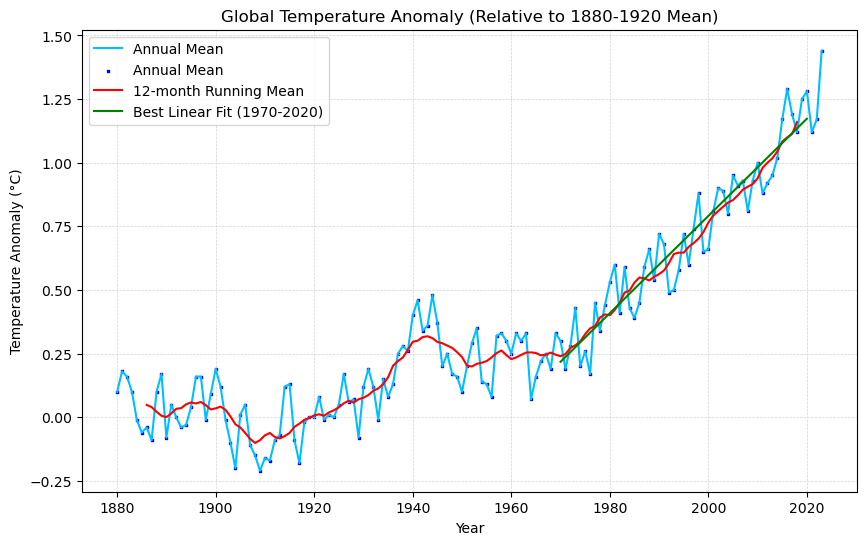

In [76]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, annual_mean, color='deepskyblue', label='Annual Mean', markersize=4)  # Light blue line
plt.scatter(years, annual_mean, color='blue', marker='s', label='Annual Mean', s=4)  # Dark blue squares
plt.plot(years, running_mean_12, 'r-', label='12-month Running Mean')   # Blue line
plt.plot(year_1970_2020, best_fit_line_limited, 'g-', label='Best Linear Fit (1970-2020)')  # Green line for 1970-2010 only

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly (Relative to 1880-1920 Mean)')
plt.legend()

# Display the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')  # Enable lighter gridlines with dashed style
plt.show()
